In [4]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd

# Use boost_histogram to make a histogram
import boost_histogram as bh

import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import os
# make ROOT-style plots using python package matplotlib
plt.style.use(hep.style.ROOT)

In [7]:
# import the dataset
basedir = '/Users/yutaozhe/Desktop/ML_root_file/'

events_sig = uproot.open(basedir + "Tprime_1200.root:tree").arrays(library='pd')
events_bkg = uproot.open(basedir + "TTToSemiLeptonic.root:tree").arrays(library='pd')

#indicate which samples are signal or background 
events_sig['target'] = 1  
events_bkg['target'] = 0  

events = pd.concat([events_sig, events_bkg], ignore_index=True)
events

,category0,category1,category2,TopMass,TopMassMerged,TopMassPartial,TopMassResolved,TopPt,TopPtMerged,TopPtPartial,...,EVENT_run,EVENT_lumiBlock,EVENT_genHT,prefiringweight,prefiringweightup,prefiringweightdown,Met_pt,Met_phi,TransverseMassMetTop,target
0,1,0,0,824.920227,-99.0,-99.0,824.920227,479.829865,-99.0,-99.0,...,1,1,880.985229,0.973236,0.967883,0.978589,288.609833,1.770995,743.948853,1
1,1,0,0,1194.095215,-99.0,-99.0,1194.095215,646.045349,-99.0,-99.0,...,1,1,732.623596,0.744055,0.695440,0.793520,649.625183,-2.063250,1293.483276,1
2,1,0,0,592.169250,-99.0,-99.0,592.169250,517.090454,-99.0,-99.0,...,1,1,726.028687,0.979933,0.972888,0.985911,422.891510,0.299643,931.010681,1
3,1,0,0,198.817764,-99.0,-99.0,198.817764,436.791382,-99.0,-99.0,...,1,1,385.675537,1.000000,1.000000,1.000000,395.429901,-1.796993,826.818665,1
4,1,0,0,186.717529,-99.0,-99.0,186.717529,366.564423,-99.0,-99.0,...,1,1,475.812225,0.976951,0.970866,0.983055,436.765533,2.825124,800.178711,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102107,1,0,0,441.757141,-99.0,-99.0,441.757141,544.770020,-99.0,-99.0,...,1,1869,692.886963,0.987234,0.984673,0.989795,342.809418,-1.624580,862.915161,0
102108,1,0,0,429.537842,-99.0,-99.0,429.537842,444.053864,-99.0,-99.0,...,1,1869,490.627930,1.000000,1.000000,1.000000,223.516403,3.114171,629.388367,0
102109,1,0,0,411.300781,-99.0,-99.0,411.300781,453.804535,-99.0,-99.0,...,1,1869,233.467621,1.000000,1.000000,1.000000,252.218002,1.816800,675.363159,0
102110,1,0,0,383.975739,-99.0,-99.0,383.975739,323.121033,-99.0,-99.0,...,1,1869,389.910645,1.000000,1.000000,1.000000,297.168152,2.624705,614.262634,0


In [12]:
#keep the columns I want
columns_to_keep = ["HT", "TopPt", "Met_pt", "Met_phi", "deltaPhiMetTop", "MinDeltaPhiJetMet", "TransverseMassMetTop", "NumSelBJetsM", "MostForwardJetPt", "NumSelForwardJets", "target"]
filtered_data = events[columns_to_keep]
filtered_data

,HT,TopPt,Met_pt,Met_phi,deltaPhiMetTop,MinDeltaPhiJetMet,TransverseMassMetTop,NumSelBJetsM,MostForwardJetPt,NumSelForwardJets,target
0,868.789612,479.829865,288.609833,1.770995,3.083043,0.093530,743.948853,1,54.614826,1,1
1,1154.990356,646.045349,649.625183,-2.063250,3.025495,0.304562,1293.483276,2,58.978439,2,1
2,860.942993,517.090454,422.891510,0.299643,2.951092,0.058694,931.010681,3,33.272594,1,1
3,526.329834,436.791382,395.429901,-1.796993,2.936320,1.339870,826.818665,1,34.800926,0,1
4,531.237793,366.564423,436.765533,2.825124,3.113666,0.647896,800.178711,1,60.939178,1,1
...,...,...,...,...,...,...,...,...,...,...,...
102107,1030.953003,544.770020,342.809418,-1.624580,3.028486,0.745300,862.915161,3,42.478504,1,0
102108,702.069519,444.053864,223.516403,3.114171,3.047207,0.390078,629.388367,0,337.695038,0,0
102109,672.508118,453.804535,252.218002,1.816800,3.019098,0.320952,675.363159,1,52.311855,0,0
102110,429.317596,323.121033,297.168152,2.624705,2.875346,0.338871,614.262634,0,42.051029,0,0


In [41]:
# Select training variables and target
X = filtered_data.iloc[:, 0:10].to_numpy() # training variable starts from the 1th to 10th column
y = filtered_data.iloc[:, 10:].to_numpy()
#X = filtered_data[["HT", "TopPt", "Met_pt", "Met_phi", "deltaPhiMetTop", "MinDeltaPhiJetMet", "TransverseMassMetTop", "NumSelBJetsM", "MostForwardJetPt", "NumSelForwardJets"]] 
#y = filtered_data[["target"]] 
print(X.shape, y.shape)

(102112, 10) (102112, 1)


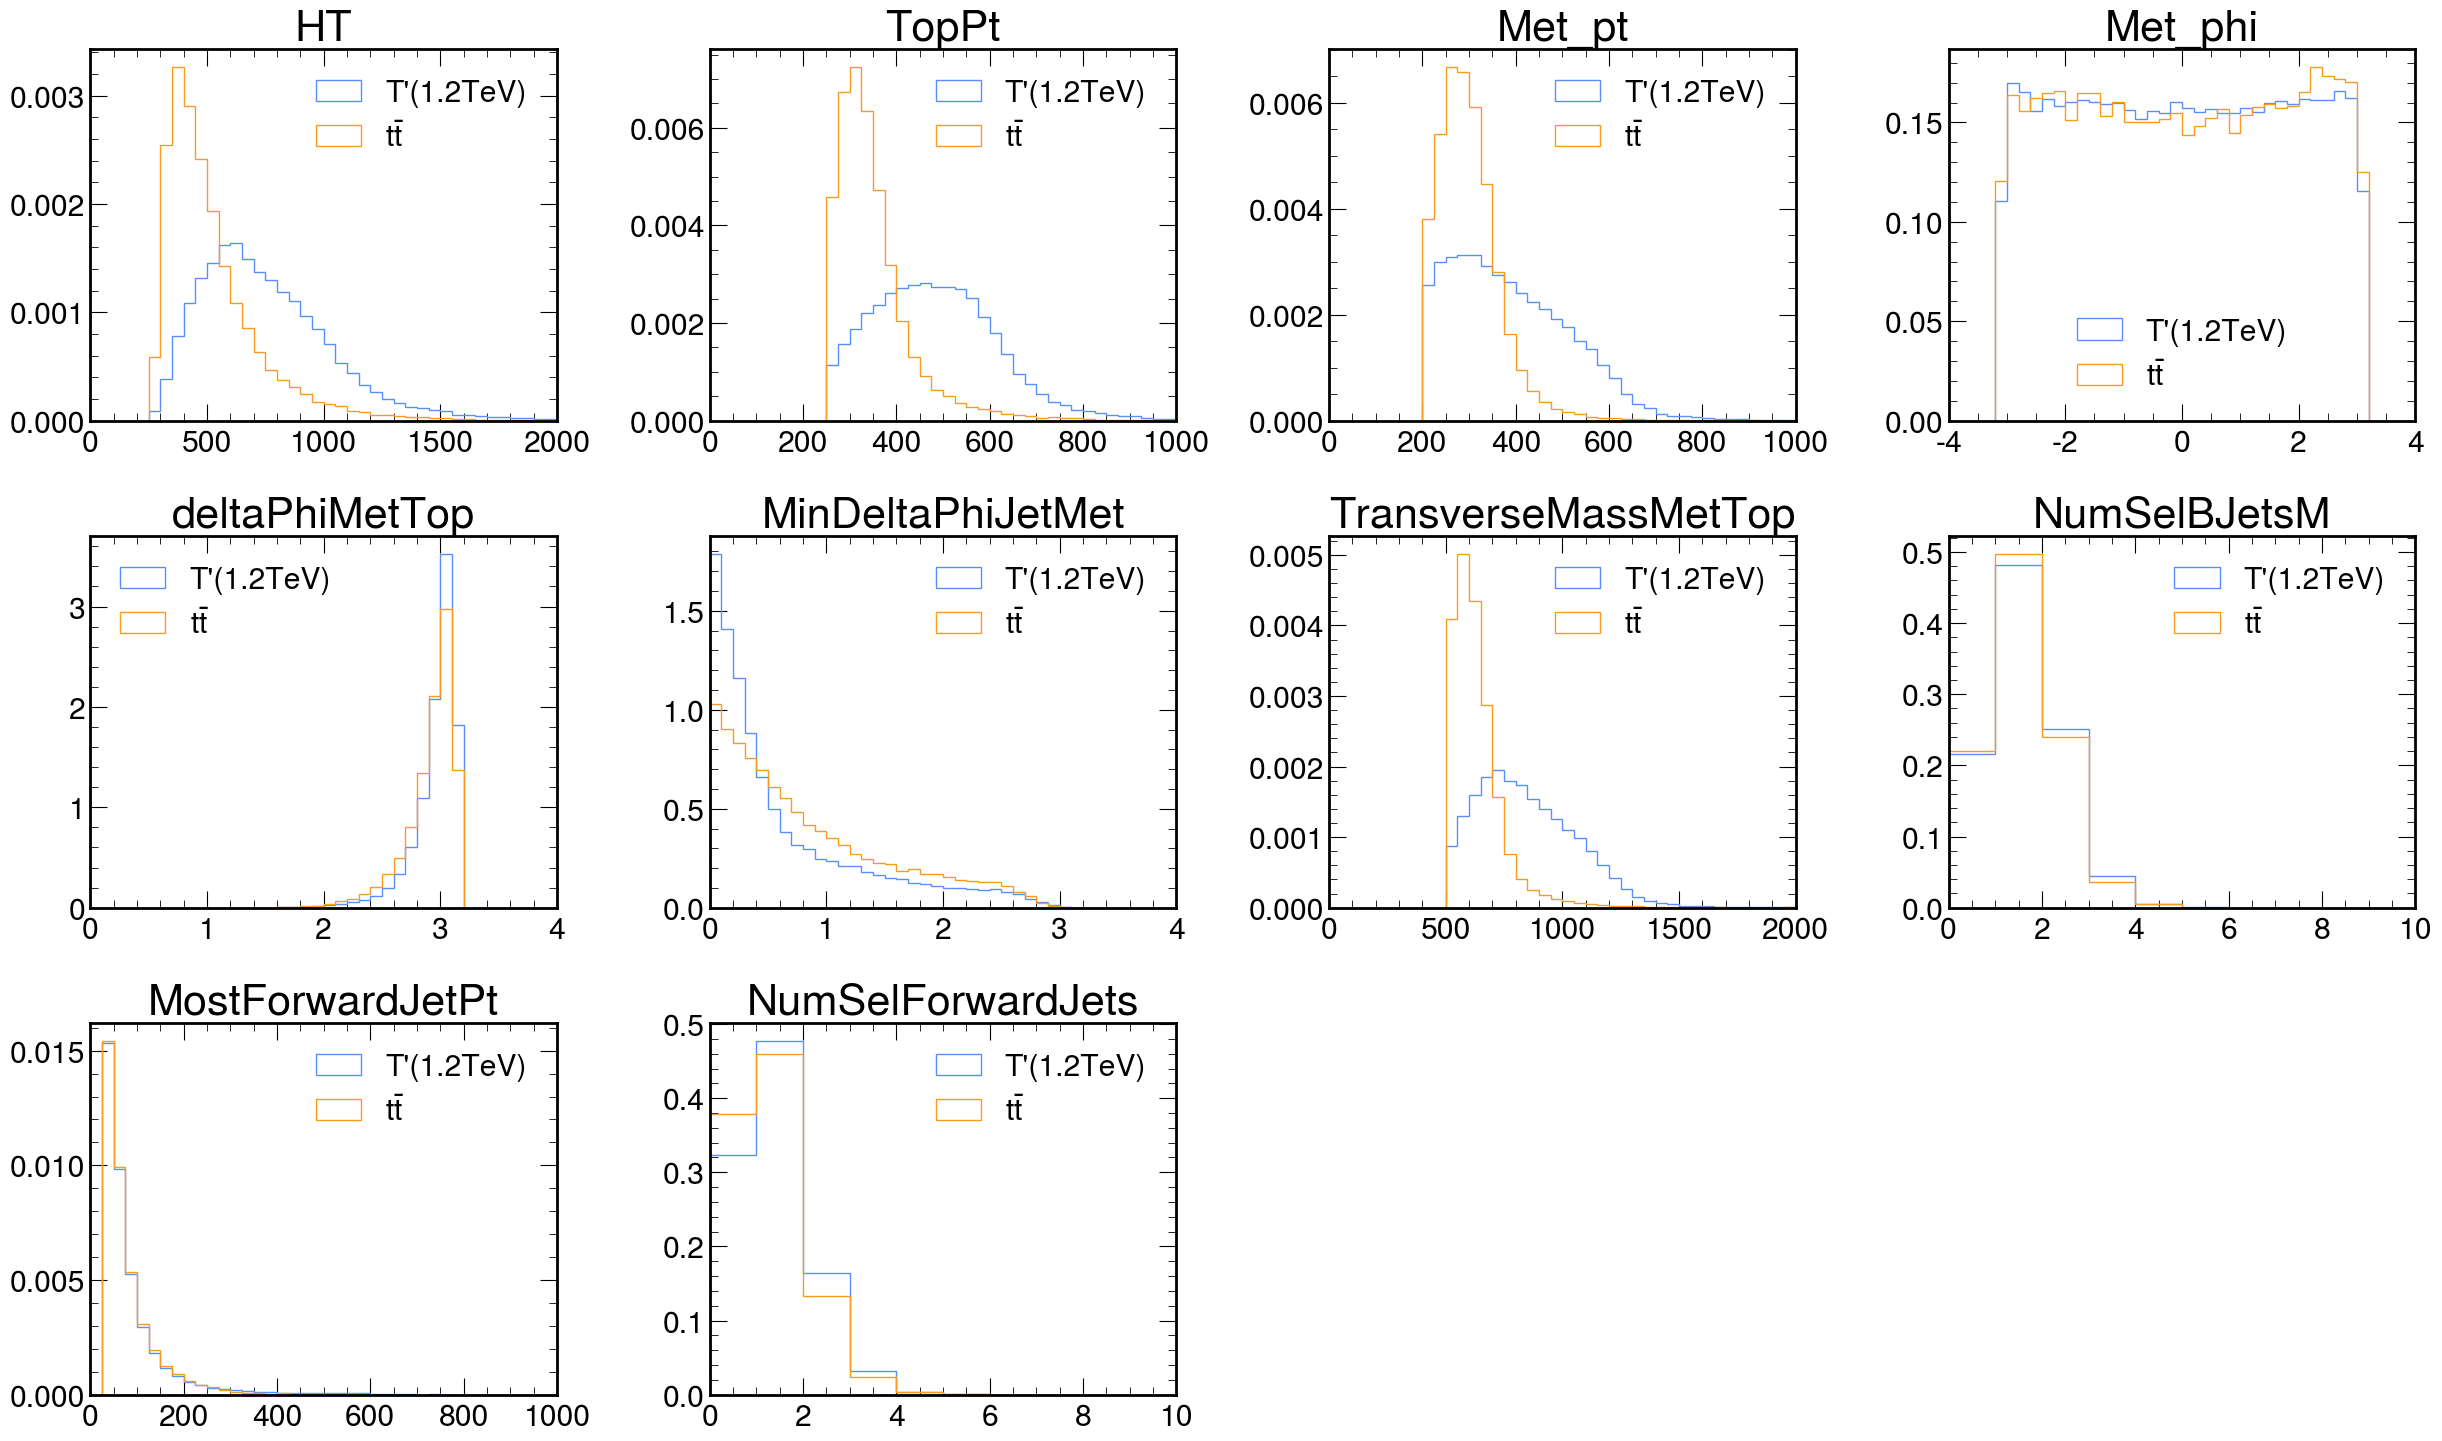

In [42]:
#plot the variable
plotinfo = [ # varname, nbin, xmin, xmax
    ('HT', 40, 0, 2000),
    ('TopPt', 40, 0, 1000),
    ('Met_pt', 40, 0, 1000),
    ('Met_phi', 40, -4, 4),
    ('deltaPhiMetTop', 40, 0, 4),
    ('MinDeltaPhiJetMet', 40, 0, 4),
    ('TransverseMassMetTop', 40, 0, 2000),
    ('NumSelBJetsM', 10, 0, 10),
    ('MostForwardJetPt', 40, 0, 1000),
    ('NumSelForwardJets', 10, 0, 10),
]

plt.figure(figsize=(25,15))
for i,info in enumerate(plotinfo):
    plt.subplot(3,4,i+1)
    varname = info[0]
    nbin = info[1]
    xmin = info[2]
    xmax = info[3]
    plt.hist(events_sig[varname],histtype="step",bins=np.linspace(xmin,xmax,nbin+1),label = "T'(1.2TeV)",density=True)
    plt.hist(events_bkg[varname],histtype="step",bins=np.linspace(xmin,xmax,nbin+1),label = "$t\\bar{t}$",density=True)
    #if i == 0:
    plt.legend()
    plt.xlim(xmin,xmax)
    plt.title(varname)
    plt.tight_layout()

In [47]:
## split the data set into parts for training, validation and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=True)
# Let's check the sizes of each
print(X_train.shape, X_test.shape)

(91900, 10) (10212, 10)


In [48]:
# Import knn classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier as knn
# Instantiate the classifier
knn_model = knn(n_neighbors=5)
knn_model

KNeighborsClassifier()

In [49]:
# And perform fit, which trains our model
knn_model.fit(X_train, y_train)

/Users/yutaozhe/Desktop/ML_with_python_Nov27/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

In [65]:
# Instantiate
dectree = DecisionTreeClassifier(max_depth=5)

# And optimize
dectree.fit(X_train,y_train)

print('Accuracy test data:  ', accuracy_score(dectree.predict(X_test),y_test))
print('Accuracy train data: ', accuracy_score(dectree.predict(X_train),y_train))

Accuracy test data:   0.804249902075989
Accuracy train data:  0.8051686615886834


In [66]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate - Depth 3
randfor = RandomForestClassifier(max_depth=3, random_state=0)

randfor.fit(X_train,y_train)

print('Accuracy test data:  ', accuracy_score(randfor.predict(X_test),y_test))
print('Accuracy train data: ', accuracy_score(randfor.predict(X_train),y_train))

/Users/yutaozhe/Desktop/ML_with_python_Nov27/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy test data:   0.7988640814727771
Accuracy train data:  0.8016866158868335


In [67]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Support Vector Regression
from sklearn.svm import SVR
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
# Neural Network
from sklearn.neural_network import MLPRegressor
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Bagging
from sklearn.ensemble import BaggingRegressor

In [68]:
%%time
dectree = DecisionTreeRegressor(max_depth=20)
randfor = RandomForestRegressor(max_depth=20)
svr = SVR()
knn = KNeighborsRegressor()
gpr = GaussianProcessRegressor(
        kernel=RBF(),
        random_state=0)
mlp = MLPRegressor()
adaboost = AdaBoostRegressor()
gradboost = GradientBoostingRegressor()
bagging = BaggingRegressor()

Regressors = [dectree, randfor, svr, knn, mlp, adaboost, gradboost, bagging] #gpr is not converging

MSE = []

for regs in Regressors:
    regs.fit(X_train, y_train)
    MSE.append([mse(regs.predict(X_train),y_train), mse(regs.predict(X_test),y_test)])
    print(regs.__class__.__name__, mse(regs.predict(X_train),y_train), mse(regs.predict(X_test),y_test))

DecisionTreeRegressor 0.047905929622202414 0.22501037148379194


/Users/yutaozhe/Desktop/ML_with_python_Nov27/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor 0.048219477122102956 0.13900166181934656


/Users/yutaozhe/Desktop/ML_with_python_Nov27/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR 0.15042652008082852 0.15189677837874974
KNeighborsRegressor 0.1092026115342764 0.1653701527614571


/Users/yutaozhe/Desktop/ML_with_python_Nov27/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor 0.2367962182433185 0.2439175968876628


/Users/yutaozhe/Desktop/ML_with_python_Nov27/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor 0.14507602864238242 0.14507900792322392


/Users/yutaozhe/Desktop/ML_with_python_Nov27/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor 0.13456736761669336 0.1377687486914358


/Users/yutaozhe/Desktop/ML_with_python_Nov27/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor 0.027043852013057677 0.15383960047003525
CPU times: user 8min 23s, sys: 3.55 s, total: 8min 27s
Wall time: 8min 28s


Text(1, 0, 'Run')

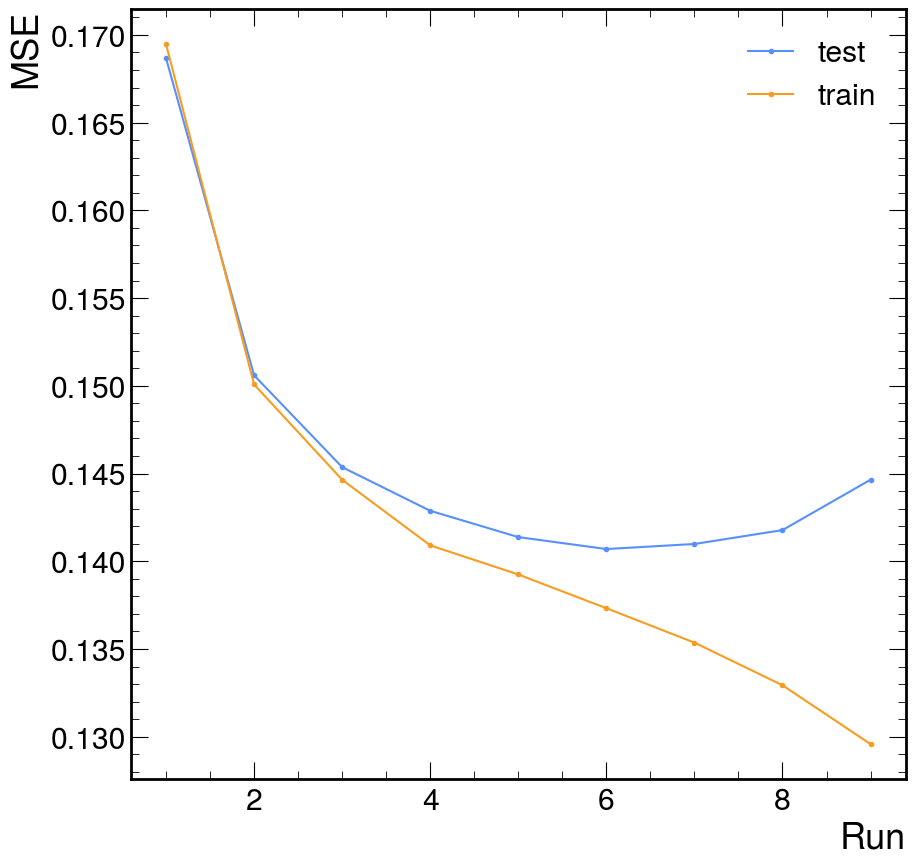

In [70]:
mse_test = []
mse_train = []
for i in range(1,10):
    dectree = DecisionTreeRegressor(max_depth=i)
    dectree.fit(X_train, y_train)
    mse_test.append(mse(dectree.predict(X_test),y_test))
    mse_train.append(mse(dectree.predict(X_train),y_train))

plt.plot(range(1,10),mse_test,'.-')
plt.plot(range(1,10),mse_train,'.-')
plt.legend(['test','train'])
plt.ylabel('MSE')
plt.xlabel('Run')

In [97]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

# Neural network: a sequence of dense layers
model = Sequential()

# model.add: to add a layer to our neural network
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
# show a summary
model.summary()

# Specify the loss and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/yutaozhe/Desktop/ML_with_python_Nov27/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,752 (22.47 KB)

 Trainable params: 5,752 (22.47 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
events_sig_nn = uproot.open(basedir + "Tprime_1200.root:tree").arrays(library='pd')
events_bkg_nn = uproot.open(basedir + "TTToSemiLeptonic.root:tree").arrays(library='pd')

#indicate which samples are signal or background 
events_sig_nn['is_sig'] = 1  
events_sig_nn['is_bkg'] = 0  

events_bkg_nn['is_sig'] = 0  
events_bkg_nn['is_bkg'] = 1

events_nn = pd.concat([events_sig_nn, events_bkg_nn], ignore_index=True)
events_nn

,category0,category1,category2,TopMass,TopMassMerged,TopMassPartial,TopMassResolved,TopPt,TopPtMerged,TopPtPartial,...,EVENT_lumiBlock,EVENT_genHT,prefiringweight,prefiringweightup,prefiringweightdown,Met_pt,Met_phi,TransverseMassMetTop,is_sig,is_bkg
0,1,0,0,824.920227,-99.0,-99.0,824.920227,479.829865,-99.0,-99.0,...,1,880.985229,0.973236,0.967883,0.978589,288.609833,1.770995,743.948853,1,0
1,1,0,0,1194.095215,-99.0,-99.0,1194.095215,646.045349,-99.0,-99.0,...,1,732.623596,0.744055,0.695440,0.793520,649.625183,-2.063250,1293.483276,1,0
2,1,0,0,592.169250,-99.0,-99.0,592.169250,517.090454,-99.0,-99.0,...,1,726.028687,0.979933,0.972888,0.985911,422.891510,0.299643,931.010681,1,0
3,1,0,0,198.817764,-99.0,-99.0,198.817764,436.791382,-99.0,-99.0,...,1,385.675537,1.000000,1.000000,1.000000,395.429901,-1.796993,826.818665,1,0
4,1,0,0,186.717529,-99.0,-99.0,186.717529,366.564423,-99.0,-99.0,...,1,475.812225,0.976951,0.970866,0.983055,436.765533,2.825124,800.178711,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102107,1,0,0,441.757141,-99.0,-99.0,441.757141,544.770020,-99.0,-99.0,...,1869,692.886963,0.987234,0.984673,0.989795,342.809418,-1.624580,862.915161,0,1
102108,1,0,0,429.537842,-99.0,-99.0,429.537842,444.053864,-99.0,-99.0,...,1869,490.627930,1.000000,1.000000,1.000000,223.516403,3.114171,629.388367,0,1
102109,1,0,0,411.300781,-99.0,-99.0,411.300781,453.804535,-99.0,-99.0,...,1869,233.467621,1.000000,1.000000,1.000000,252.218002,1.816800,675.363159,0,1
102110,1,0,0,383.975739,-99.0,-99.0,383.975739,323.121033,-99.0,-99.0,...,1869,389.910645,1.000000,1.000000,1.000000,297.168152,2.624705,614.262634,0,1


In [99]:
#keep the columns I want
columns_to_keep_nn = ["HT", "TopPt", "Met_pt", "Met_phi", "deltaPhiMetTop", "MinDeltaPhiJetMet", "TransverseMassMetTop", "NumSelBJetsM", "MostForwardJetPt", "NumSelForwardJets", "is_sig","is_bkg"]
filtered_data_nn = events_nn[columns_to_keep_nn]
filtered_data_nn

,HT,TopPt,Met_pt,Met_phi,deltaPhiMetTop,MinDeltaPhiJetMet,TransverseMassMetTop,NumSelBJetsM,MostForwardJetPt,NumSelForwardJets,is_sig,is_bkg
0,868.789612,479.829865,288.609833,1.770995,3.083043,0.093530,743.948853,1,54.614826,1,1,0
1,1154.990356,646.045349,649.625183,-2.063250,3.025495,0.304562,1293.483276,2,58.978439,2,1,0
2,860.942993,517.090454,422.891510,0.299643,2.951092,0.058694,931.010681,3,33.272594,1,1,0
3,526.329834,436.791382,395.429901,-1.796993,2.936320,1.339870,826.818665,1,34.800926,0,1,0
4,531.237793,366.564423,436.765533,2.825124,3.113666,0.647896,800.178711,1,60.939178,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
102107,1030.953003,544.770020,342.809418,-1.624580,3.028486,0.745300,862.915161,3,42.478504,1,0,1
102108,702.069519,444.053864,223.516403,3.114171,3.047207,0.390078,629.388367,0,337.695038,0,0,1
102109,672.508118,453.804535,252.218002,1.816800,3.019098,0.320952,675.363159,1,52.311855,0,0,1
102110,429.317596,323.121033,297.168152,2.624705,2.875346,0.338871,614.262634,0,42.051029,0,0,1


In [100]:
# Select training variables and target
X_nn = filtered_data_nn.iloc[:, 0:10].to_numpy() # training variable starts from the 1th to 10th column
y_nn = filtered_data_nn.iloc[:, 10:].to_numpy()
#X = filtered_data[["HT", "TopPt", "Met_pt", "Met_phi", "deltaPhiMetTop", "MinDeltaPhiJetMet", "TransverseMassMetTop", "NumSelBJetsM", "MostForwardJetPt", "NumSelForwardJets"]] 
#y = filtered_data[["target"]] 
print(X_nn.shape, y_nn.shape)

(102112, 10) (102112, 2)


In [101]:
## split the data set into parts for training, validation and testing
from sklearn.model_selection import train_test_split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.1, random_state=0, shuffle=True)

In [102]:
# Start training
history = model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=1024)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5580 - loss: 11.7158  
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6389 - loss: 0.7025
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - loss: 0.7084
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6774 - loss: 0.6953
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7117 - loss: 0.5581
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5329
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7032 - loss: 0.5803
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6883 - loss: 0.6117
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7474 - loss: 0.5138
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7435 - loss: 0.5168
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7207 - loss: 0.5637
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7312 -

In [103]:
# Then evaluate accuracy on the test set
_, accuracy = model.evaluate(X_test_nn, y_test_nn)
print('Accuracy: %.2f' % (accuracy*100))

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.7974 - loss: 0.4577
Accuracy: 80.19
